In [1]:
# Features:
#  - read data from BYB (.wav) file

In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
# Crop A One-Dimensional Data Array from the Front

def front_crop(data_array, crop_at):
    # Crop the front of a data array
    # crop_at(int): the index of the last sample to remove from the front of the data array
    # return the cropped array
    if crop_at > len(data_array):
        return "ERROR: crop_at larger than data"
    else:
        return data_array[crop_at+1:]

In [4]:
# Crop A One-Dimensional Data Array from the Back

def back_crop(data_array, crop_at):
    # Crop the back of a data array
    # crop_at(int): the index of the last sample to remove from the back of the data array
    # return the cropped array
    if crop_at > len(data_array):
        return "ERROR: crop_at larger than data"
    else:
        return data_array[:crop_at]

In [5]:
def bp_filter(data2f, cutoff, filt_type, sample_rate):
    # Bandpass filter above or below a cutoff frequency
        # data2f - data to filter
        # cutoff - cutoff frequency
        # filt_type - 'high' - remove fq's below cuttoff
        #             'low' - remove fq's above cutoff 

    b, a = signal.butter(2, cutoff, filt_type, fs=sample_rate)
    fd_data = signal.filtfilt(b, a, data2f) # filtered data
    
    return fd_data

In [145]:
def gen_test_sig(n, sample_rate, f, plot=True):
    # Generate a Test Signal with a specific number of samples, sample rate, and frequency
    # Warning: Be sure the frequency of signal you want to generate is at most 1/4 the sample_rate...
    #             ...you choose to ensure a high quality signal
    # -----------------------------------------------------------------------------------------------
    # n - Samples Recorded
    # sample_rate - # Samples per Second
    # f - Frequency of Signal to Generate
    # plot - Plot the Signal
    # -----------------------------------------------------------------------------------------------
    # Return a 1D vector sine wave of frequency f, sample rate sample_rate, n-samples long
    # -----------------------------------------------------------------------------------------------

    X = np.linspace(0, n-1, n) # Samples (zero-indexed)
    T = X/sample_rate # Time in seconds

    Y = [] # Sin Wave of chosen frequency

    for t in T:
        Y.append(np.sin(f*(2*np.pi*t)))
        
    if plot:
        print("Plotting Test Signal")
        plt.plot(T, Y)
        plt.title(str(f) + " Cycle(s) per Second Sin Wave")
        plt.ylabel("Amplitude")
        plt.xlabel("Seconds")
        plt.tick_params(left=False, bottom=False)
        
    return Y

In [ ]:
def get_samples_vector(n):
    # Generate 

In [6]:
# Read Data
filename = "BYB_Recording_2022-06-08_20.34.54.wav"
sample_rate, raw_data = wavfile.read(filename)
rec_time = len(raw_data) / sample_rate

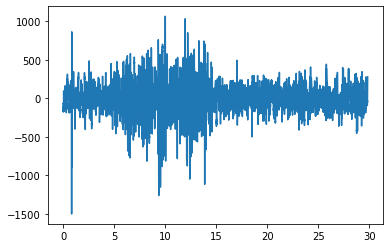

In [7]:
X = np.linspace(0, rec_time, len(raw_data))
Y = raw_data
plt.plot(X, Y)

# Filter

In [8]:
fd_data = bp_filter(raw_data, 10, 'low', sample_rate)

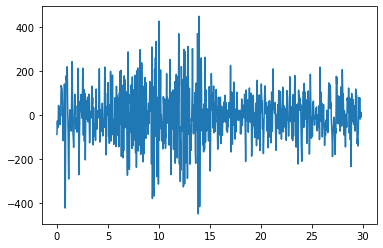

In [9]:
X = np.linspace(0, rec_time, len(fd_data))
Y = fd_data
plt.plot(X, Y)

# Generate Test Signal

In [126]:
# Create a Sin wave signal with n samples at a sample rate of fs and frequency f
# Warning: Be sure the frequency of signal you want to generate is at most 1/4 the sample_rate...
           # ...you choose to ensure a high quality signal
n = 100 # Samples Recorded
sample_rate = 10 # Samples per Second
f = 1 # Frequency of Signal to Generate

Plotting Test Signal


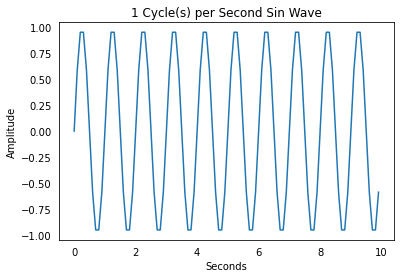

In [156]:
n = 100
sample_rate = 10
f = 1

X = np.linspace(0, n-1, n) # Samples (zero-indexed)
T = X/sample_rate # Time in seconds

Y = gen_test_sig(n, sample_rate, f, plot=True)